In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
from config_images import *
import matplotlib.gridspec as gridspec

In [2]:
#save_path = "/home/rodrigo/supernovae_detection/simulated_data/image_sequences/"
save_path = "/home/ereyes/Projects/Alerce/AlerceDHtest/datasets/ZTF/simulated_data/image_sequences/ztf_positive_psf_ztf_positive_psf10"#"/home/rcarrasco/simulated_data/image_sequences/ztf_positive_psf_ztf_positive_psf10"
f = h5py.File(save_path+".hdf5", "r")
fields = list(f.keys())
#stats = np.load("/home/toshiba/rodrigo/simulated_lightcurves/multiclass_SNLS_short20000.pkl")

In [3]:
list(f.keys()) # ['Field01', 'Field02', 'Field03', 'Field04' ...]
list(f["Field01"].keys())
"""['count_lightcurves',
 'galaxy_flag',
 'galaxy_image',
 'ids',
 'images',
 'labels',
 'lc_type',
 'lightcurves',
 'obs_cond',
 'psf_image']"""
data_keys = ['count_lightcurves',
 'galaxy_flag',
 'galaxy_image',
 'ids',
 'images',
 'labels',
 'lc_type',
 'lightcurves',
 'obs_cond',
 'psf_image']
list(f["Field01"]["images"].keys())

['g', 'r']

In [4]:
list(f["Field01"].keys())

['count_lightcurves',
 'estimated_counts',
 'estimated_error_counts',
 'galaxy_flag',
 'galaxy_image',
 'ids',
 'images',
 'labels',
 'lc_type',
 'lightcurves',
 'obs_cond',
 'psf_image']

In [5]:
def print_shape(f, data_keys, n_fields = 5, bands = ["g", "r"]):
    fields = list(f.keys())
    for field in fields[:n_fields]:
        print("Field", field)
        #data_keys = list(f[field].keys())
        for k in data_keys:
            for b in bands:
                print("key:",k," band:", b)
                if k not in ["galaxy_flag", "ids", "labels", "lc_type", "obs_cond"]:
                    print(f[field][k][b].shape)
                elif k == "obs_cond":
                    k_keys = list(f[field][k].keys())
                    for k_obs in k_keys:
                        if k_obs in ["filter", "limmag3"]:
                            continue
                        print("obs_cond", k_obs)
                        print(f[field][k][k_obs][b].shape)
                else:
                    print(f[field][k].shape)
print_shape(f, data_keys)

Field Field01
key: count_lightcurves  band: g
(60, 11)
key: count_lightcurves  band: r
(60, 12)
key: galaxy_flag  band: g
(60,)
key: galaxy_flag  band: r
(60,)
key: galaxy_image  band: g
(60, 21, 21, 11)
key: galaxy_image  band: r
(60, 21, 21, 12)
key: ids  band: g
(60,)
key: ids  band: r
(60,)
key: images  band: g
(60, 21, 21, 11)
key: images  band: r
(60, 21, 21, 12)
key: labels  band: g
(60,)
key: labels  band: r
(60,)
key: lc_type  band: g
(60,)
key: lc_type  band: r
(60,)
key: lightcurves  band: g
(60, 11)
key: lightcurves  band: r
(60, 12)
key: obs_cond  band: g
obs_cond airmass
(11,)
obs_cond epoch
(11,)
obs_cond exp_time
(11,)
obs_cond flux_conversion
(11,)
obs_cond good_quality_points
(11,)
obs_cond limmag5
(11,)
obs_cond obs_day
(11,)
obs_cond seeing
(11,)
obs_cond sky_brightness
(11,)
obs_cond zero_point
(11,)
key: obs_cond  band: r
obs_cond airmass
(12,)
obs_cond epoch
(12,)
obs_cond exp_time
(12,)
obs_cond flux_conversion
(12,)
obs_cond good_quality_points
(12,)
obs_cond l

['count_lightcurves', 'estimated_counts', 'estimated_error_counts', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
g: (60, 21, 21, 5) r: (60, 21, 21, 25)
g: (60, 5) r: (60, 25)
[238.40395 241.09995 241.03767 241.30412 241.16982 238.2321  238.26552
 241.19563 238.18083 238.39447 241.04152 238.26196 240.89421 241.19891
 238.39392 238.48965 241.16814 238.21062 237.67207 240.50072 241.04253
 238.24062 241.33228 238.32826 238.37617]
obs days <HDF5 dataset "g": shape (5,), type "<f8">
estimated_counts <HDF5 dataset "g": shape (60, 5), type "<f8">
obs days <HDF5 dataset "r": shape (25,), type "<f8">
estimated_counts <HDF5 dataset "r": shape (60, 5), type "<f8">


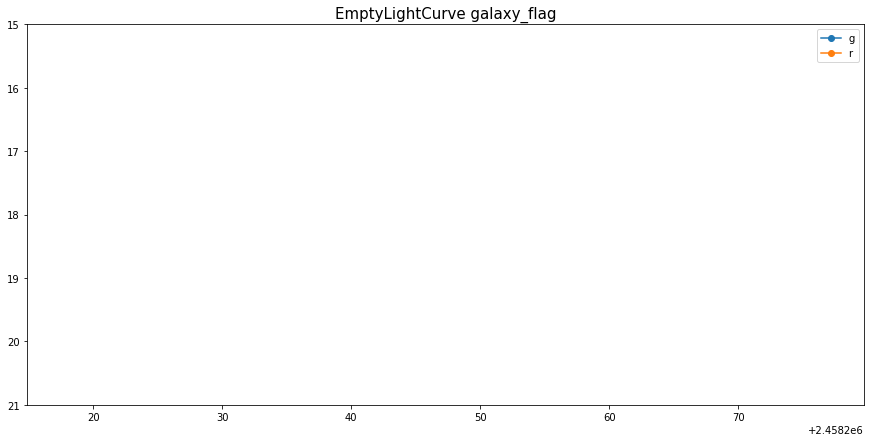

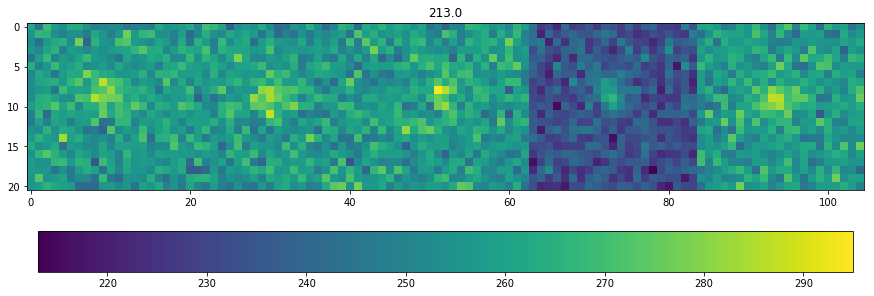

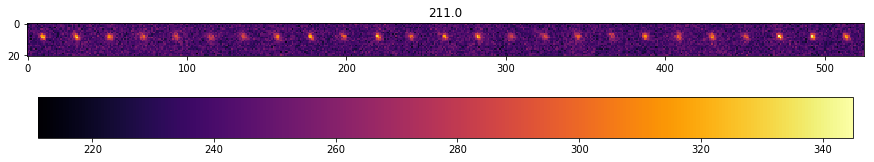

In [12]:
bands = ["g", "r"]
n_per_field = 3
to_plot = 13
for field in ['Field04']:#fields:
    field_data = f[field]
    print(list(field_data))
    field_images = field_data["images"]
    print("g:", field_images["g"].shape, "r:", field_images["r"].shape)
    field_lc = field_data["lightcurves"]
    print("g:", field_lc["g"].shape, "r:", field_lc["r"].shape)
    days = field_data["obs_cond"]["obs_day"]
    print(field_data["obs_cond"]["sky_brightness"]["r"][:])
    Co = field_data["lc_type"][to_plot]
    plt.figure(figsize=(15, 7))
    for band in bands:
        print('obs days %s' % str(days[band]))
        print('estimated_counts %s' % str(field_data['estimated_counts'][band]))
        plt.plot(days[band], field_lc[band][to_plot, ...], "o-", label=band)
    galaxy_flag = field_data["galaxy_flag"][to_plot]
    plt.title(Co+" galaxy_flag", fontsize=15)
    plt.ylim([21, 15])
    plt.legend()
    plt.show()
    for band in bands:
        plt.figure(figsize=(15,5))
        n_images = field_lc[band].shape[1]
        empty_image = np.zeros((21, 21*n_images,))
        for i in range(n_images):
            empty_image[:, i*21:(i+1)*21] = field_images[band][to_plot, :, :, i]
        if band == "g":
            c_map = "viridis"
        else:
            c_map = "inferno"
        plt.imshow(empty_image, cmap=c_map)
        plt.title(np.amin(empty_image))
        plt.colorbar(orientation="horizontal")
        plt.show()